In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv("C:\\Users\\Surbhi\\Downloads\\spam.csv", encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
# Step 2: Drop unnecessary columns
df = df[['v1', 'v2']]
df.columns = ['Label', 'Message']

In [7]:
print("Null values:\n", df.isnull().sum())

Null values:
 Label      0
Message    0
dtype: int64


In [8]:
# Step 4: Visualize class distribution
label_counts = df['Label'].value_counts().reset_index()
label_counts.columns = ['Label', 'Count']

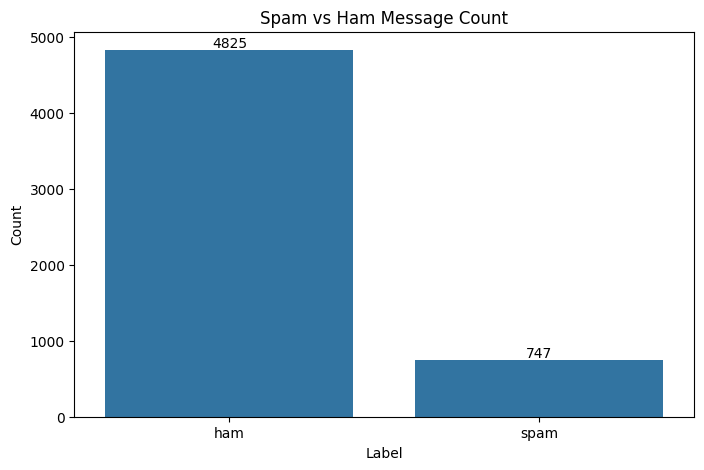

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(data=label_counts, x='Label', y='Count')
plt.title("Spam vs Ham Message Count")
for i, val in enumerate(label_counts['Count']):
    plt.text(i, val, str(val), ha='center', va='bottom')
plt.show()

In [10]:
# Step 5: Convert labels to binary
df['Target'] = df['Label'].apply(lambda x: 1 if x == 'spam' else 0)

C:\Users\Surbhi\AppData\Local\Temp\ipykernel_21204\3645639437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = df['Label'].apply(lambda x: 1 if x == 'spam' else 0)


In [11]:
# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Target'], test_size=0.2, random_state=42)


In [12]:
# Step 7: Vectorize with CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [13]:
# Step 8: Train Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [14]:
# Step 9: Evaluate model
accuracy = nb_classifier.score(X_test_vectorized, y_test)
print(f"\nModel Accuracy: {accuracy:.4f}")


Model Accuracy: 0.9839


In [15]:
 #Classification report
y_pred = nb_classifier.predict(X_test_vectorized)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))


Classification Report:
               precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       965
        Spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [16]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)

Confusion Matrix:
 [[963   2]
 [ 16 134]]


In [17]:
# Step 10: Use pipeline for simplicity
spam_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])
spam_pipeline.fit(X_train, y_train)
pipeline_score = spam_pipeline.score(X_test, y_test)
print(f"\nPipeline Accuracy: {pipeline_score:.4f}")


Pipeline Accuracy: 0.9839


In [18]:
# Step 11: Pre-trained prediction
test_messages = [
    "Congratulations! You've won a free trip to Bahamas. Call now to claim.",
    "Hey, can you call me after your class?",
    "URGENT: Your account is suspended due to suspicious activity. Click the link to verify.",
    "Lunch at 1 PM?",
    "You have been selected for a $1000 Amazon gift card!"
]

predicted_labels = spam_pipeline.predict(test_messages)

print("\n Spam Prediction Results:")
for msg, label in zip(test_messages, predicted_labels):
    if label == 1:
        print(f" '{msg}' → SPAM")
    else:
        print(f" '{msg}' → NOT SPAM")


 Spam Prediction Results:
 'Congratulations! You've won a free trip to Bahamas. Call now to claim.' → SPAM
 'Hey, can you call me after your class?' → NOT SPAM
 'URGENT: Your account is suspended due to suspicious activity. Click the link to verify.' → SPAM
 'Lunch at 1 PM?' → NOT SPAM
 'You have been selected for a $1000 Amazon gift card!' → SPAM
